In [101]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs
import configs

device = 'cpu'

# Load results

In [36]:
with open(f'{configs.engram_dir}02_learn_retrieve/results.p', 'rb') as f:
    results = pickle.load(f)

In [70]:
with open('../trained_models/02_learn_retrieve/results.p', 'rb') as f:
    results = pickle.load(f)

In [71]:
for key in results.keys():
    results[key] = np.array(results[key])

In [72]:
learn_gammas = results['learn_gammas']
retrieve_gammas = results['retrieve_gammas']
t_vals = results['t_vals']
m_vals = results['m_vals']
nonlinearity = results['nonlinearity']

# Linear

/Users/chingfang/opt/anaconda3/envs/aronov/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


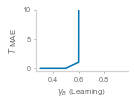

In [112]:
xs = []
ys = []
for g in np.unique(learn_gammas):
    idxs = np.logical_and(learn_gammas==g, nonlinearity=='None')
    ys.extend(t_vals[idxs])
    xs.extend([g]*t_vals[idxs].size)
fig, ax = plt.subplots(figsize=(2., 1.5))
sns.lineplot(xs, ys, ax=ax)
plt.xlabel('$\gamma_B$ (Learning)')
plt.ylim(-0.5, 10)
plt.ylabel('$T$ MAE')
plt.tight_layout()
plt.savefig(f"../figures/S3e.png", dpi=300, transparent=True)
plt.show()

In [114]:
xs = np.sort(np.unique(learn_gammas))
ys = np.sort(np.unique(retrieve_gammas))

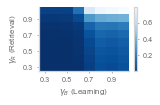

In [115]:
mat = np.zeros((ys.size, xs.size))*np.nan # mat gets flipped by imshow
for x_idx, x in enumerate(xs):
    for y_idx, y in enumerate(ys):
        idxs = np.logical_and(learn_gammas==x, retrieve_gammas==y)
        idxs = np.logical_and(idxs, nonlinearity=='None')
        val = m_vals[idxs]
        mat[-y_idx-1][x_idx] = np.mean(val)

plt.figure(figsize=(2.25, 1.5))
pcm = plt.imshow(
    mat, cmap="Blues_r",
    aspect='auto'
    )
plt.colorbar(pcm)
plt.xticks(np.arange(ys.size)[::2], ys[::2])
plt.yticks(np.arange(len(xs))[::2]+1, xs[::2][::-1])
plt.xlabel('$\gamma_B$ (Learning)')
plt.ylabel('$\gamma_R$ (Retrieval)')
plt.tight_layout()
plt.savefig(f"../figures/S3f.png", dpi=300, transparent=True)
plt.show()

# Tanh

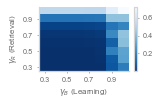

In [116]:
mat = np.zeros((ys.size, xs.size))*np.nan # mat gets flipped by imshow
for x_idx, x in enumerate(xs):
    for y_idx, y in enumerate(ys):
        idxs = np.logical_and(learn_gammas==x, retrieve_gammas==y)
        idxs = np.logical_and(idxs, nonlinearity=='Tanh')
        val = m_vals[idxs]
        mat[-y_idx-1][x_idx] = np.mean(val)

plt.figure(figsize=(2.25, 1.5))
pcm = plt.imshow(
    mat, cmap="Blues_r",
    aspect='auto'
    )
plt.colorbar(pcm)
plt.xticks(np.arange(ys.size)[::2], ys[::2])
plt.yticks(np.arange(len(xs))[::2]+1, xs[::2][::-1])
plt.xlabel('$\gamma_B$ (Learning)')
plt.ylabel('$\gamma_R$ (Retrieval)')
plt.tight_layout()
plt.savefig(f"../figures/S3g.png", dpi=300, transparent=True)
plt.show()